# Assignment 2

In this section we will have an original task: Given a question, how do you know if it was a genuine question from someone who are searching for an answer, or merely asked for some other reasons?

## Input Data
### Load libraries

Nothing new here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

The dataset is part of **Quora's <a href="https://www.kaggle.com/c/quora-insincere-questions-classification/data">Insincere Questions Classification</a> Competition**. You are free to explore the data as you see fit.

In [2]:
data = pd.read_csv("train.csv", header=0)

In [3]:
print("Number of questions: {:d}".format(len(data)))
print("Insincere percentile: {:.2f}%".format( float(len(data[data["target"] == 1])) / len(data) * 100.0))
print("Sample question (idx=6000): {:s}".format(data.iloc[6000]["question_text"]))
data.head(10)

Number of questions: 1306122
Insincere percentile: 6.19%
Sample question (idx=6000): What starters should a person avoid when engaging a conversation?


,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


### Sampling

We can reduce the number of samples used in order to make the process faster, but this isn't proper.

In [12]:
sample_data = data.sample(frac=0.1, random_state=13)
print("Number of questions (sample): {:d}".format(len(sample_data)))
print("Insincere percentile (sample): {:.2f}%".format( float(len(sample_data[sample_data["target"] == 1])) / len(sample_data) * 100.0))
data = sample_data

Number of questions (sample): 130612
Insincere percentile (sample): 6.19%


### Tokenization

Unlike in our usual working on perfect data during the course, the `question_text` field had not yet tokenized. If you just blindly put them into a model, the performance would be atrocious (for, say, <u>conversation?</u> will be counted as a single token instead of two tokens <u>conversation</u> and <u>?</u>). Good thing that the questions are in english, and we already have a well-trusted tool for this matter: <a href="">NLTK</a>

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
data = data.rename(columns={"question_text": "raw_text"})
data["tokenized_text"] = data["raw_text"].map(lambda raw_text: (" ".join(word_tokenize(raw_text.strip()))).lower())
data.head(5)

## Common topic modeling choices
### Build a model on the data

The easiest way to go on is to use good old sklearn's LDA as we learned them (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html">link</a>). Use CountVectorizer and LDA to search for underlying topics in the data. For this problem, we will assume to have 25 topics presented in the data.

*Note: The prefered arguments for CountVectorizer are max_df=0.98, min_df=5, ngram_range=(1, 2), stop_words="english". This avoid stop words, construct 2-grams and remove both too frequent and infrequent words. However, students are free to choose the arguments in general.*

Also, keep the component distribution. You will be grateful of it later.

In [ ]:
# the number of topics
topic_count = 25
# Construct the CountVectorizer and create word count matrix

# fit transform the LDA model on the word count


### Interpret the topics generated

You are free to do whatever you want to demonstrate the topics that had been chosen. Our recommended practice is to use a function to extract the values per words.

### Distribution of insincere questions

Alright, that's a pretty neat division of topics you might have there, but how do we apply it to our problem? It turns out that while all topics is equal, some just attract far more junk than the other. Calculate the percentage of insincere questions per each topics.

The code below assumes that you already have a variable `distribution` of shape *\[num_samples, topic_count\]* denoting the topic distribution for each sample. If you don't have any such values, please modify the code as you see fit.

Topic 0 insincere percentage: 7.38%
Topic 1 insincere percentage: 6.59%
Topic 2 insincere percentage: 12.26%
Topic 3 insincere percentage: 4.47%
Topic 4 insincere percentage: 10.58%
Topic 5 insincere percentage: 3.40%
Topic 6 insincere percentage: 3.34%
Topic 7 insincere percentage: 4.63%
Topic 8 insincere percentage: 2.30%
Topic 9 insincere percentage: 8.08%
Topic 10 insincere percentage: 4.96%
Topic 11 insincere percentage: 4.68%
Topic 12 insincere percentage: 11.16%
Topic 13 insincere percentage: 7.49%
Topic 14 insincere percentage: 5.32%
Topic 15 insincere percentage: 7.07%
Topic 16 insincere percentage: 7.91%
Topic 17 insincere percentage: 7.45%
Topic 18 insincere percentage: 8.83%
Topic 19 insincere percentage: 2.77%
Topic 20 insincere percentage: 5.23%
Topic 21 insincere percentage: 4.13%
Topic 22 insincere percentage: 7.36%
Topic 23 insincere percentage: 1.71%
Topic 24 insincere percentage: 4.79%


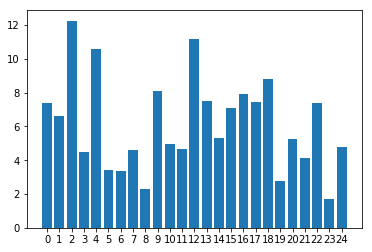

In [21]:
# distribution = model.transform(count_data)
assignment = np.argmax(distribution, axis=-1)
percs = []
for i in range(topic_count):
    i_topic = data.iloc[assignment == i]
    insincere_perc = len(i_topic[i_topic["target"] == 1]) / len(i_topic) * 100.0
    print("Topic {:d} insincere percentage: {:.2f}%".format(i, insincere_perc))
    percs.append(insincere_perc)

ax = plt.subplot()
ax.bar(range(topic_count), percs)
ax.set_xticks(range(topic_count))
plt.show()

Write some code to calculate and show a bar chart denoting the percentages(and/or count) of each topic contributing to the number of insincere questions.

Specific topics have an disproportionate amount of insincere questions. Use `.sample` to take some questions from the topic with the highest and lowest percentage of insincere questions.

In [29]:
state = 5

highest_idx = ...
highest_samples = data.iloc[assignment == highest_idx].sample(n=10, random_state=state)
print("Highest topic samples:\n\t{:s}".format("\n\t".join(highest_samples["raw_text"])))
lowest_idx = ...
lowest_samples = data.iloc[assignment == lowest_idx].sample(n=10, random_state=state)
print("Lowest topic samples:\n\t{:s}".format("\n\t".join(lowest_samples["raw_text"])))

Highest topic samples:
	If a person doesn't know whether to talk to themselves when at home, should they be allowed to arrange a press conference to settle the matter?
	How do I fool Indian people?
	Where is Lisa Eldridge coming in India? Does anyone know the city?
	What are some gluten free sohan papdi recipes?
	How can I deal with rude people and not get nervous?
	Are network sockets used for mobile network programming/mobile apps?
	What are the five wonders of people?
	Is Ayurveda not working properly for people?
	How do you pronounce Dritsas?
	How do we know there are exactly 2 electric charges?
Lowest topic samples:
	Is there any way to make existential anxiety go away?
	What do appendix operation scars look like? How do you determine if it is one?
	Which are the top web development companies in India?
	Who is the best iOS app development company in Germany?
	What is demonstrative communication?
	Is there a distinction between a software library and a software framework?
	What are

### Alternative: Build the topic model on solely insincere data

Flipping the question since we now know that insincere questions tend to gravitate toward specific topics: Can we instead isolate the specific topics directly from the insincere portions of the data? Let's try it out. 

Build the same topic model and extract related topics just as above.

### Analysis

From the distribution above, we can clearly detect some words that are hotbeds for inflamatory purpose, for example, *"trump"*. Let's plug it back into our dataset as a keywords and see how many insincere questions are asked with it and how many isn't.

Set `safe_check` to False to trade accuracy for speed.

In [42]:
def keyword_percentage(dataframe, word, safe_check=True):
    if(safe_check):
        checker_fn = lambda text: word in text.lower().strip().split()
    else:
        checker_fn = lambda text: word in text.lower()
    contain = dataframe[dataframe["tokenized_text"].map(checker_fn)]
    try:
        return float(len(contain[contain["target"] == 1])) / len(contain)
    except ZeroDivisionError:
        return 0.0

test_keyword = "trump"
print("Percentage for keyword \"{:s}\": {:.2f}%".format(test_keyword, keyword_percentage(data, test_keyword) * 100.0))

Percentage for keyword "trump": 43.01%


We could easily streamline the process for the topic words generated from the model. With **3** best words per topic, display the above insincere percentage for each of them in another <u>bar chart</u>.

**Optional: sample a number of random keyword (say, 5 of them) in the dataset and draw them on the bar chart along the other values.**

It is pretty clear that many keywords constitute a fair amount of abuse, with special cases have more than 40% of their question flagged as insincere. These keywords can be used in conjuntion with other classification methods to catch most insincere questions.

## (Optional) Advanced methods and alternatives

### Non-Negative Matrix Factorization
An alternative choice for topic modeling that we haven't had the chance to explore is Non-Negative Matrix Factorization (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF">link</a>). You can redo the above case with this module instead and see if the result improves.

### Implementation of Classification

Student who had ran through the previous Classification course can try tackle this problem and see if the new insights offered in this notebook would translate to a higher accuracy score.